1
total_levels: 464
2
total_levels: 1163


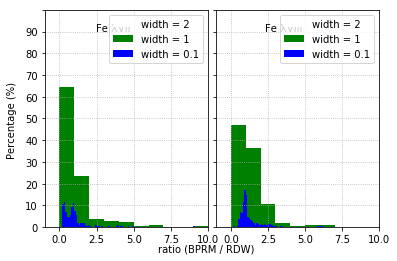

In [2]:
#This script is to plot the ratio of matching in histogram for both fe xvii and fe xviii.
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import numpy as np
import os

#define a function that sets the common things
def setup(data_file, ax, color_narrow, color_wide, count = [0]):
	count[0] += 1 #mutable used to keep information. Useful!
	print (count[0])
	data = []
	total_levels = int(os.popen('wc -l ' + data_file).read().split()[0])
	print ('total_levels: %d' % (total_levels))
	for line in open(data_file):
		data.append(float(line.strip()))
	
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	
	ax.hist(data, color = 'white', bins = np.arange(0, 20, 2), label = 'width = 2') # total
	ax.hist(data, color = color_wide, bins = np.arange(0, 20, 1), label = 'width = 1')
	ax.hist(data, color = color_narrow, bins = np.arange(0, 20, .1), label = 'width = 0.1')
	
	ax.legend(prop={'size': 10})
	
	ax.set_xlim(-1, 10)
	#ax.set_ylim(0, 100)
	
#	ax.yaxis.set_major_formatter(FormatStrFormatter('%.f')) #does not work as expected.

	##Use the original tick locations
	#ax.set_yticklabels(ax.get_yticks())
	#labels = ['%d'%(float(label.get_text())/total_levels*100) for label in ax.get_yticklabels()]
	#ax.set_yticklabels(labels)
	
	#Customize the tick locations.
	labels = np.arange(0, 1.1, 0.1) * total_levels #adjust the upper range when the y-grid line
												  #misaligned.
	ax.set_yticks(labels)
	if count[0] == 1:
		ax.set_yticklabels([str(i) for i in range(0, 91, 10)])
	else:
		ax.set_yticklabels([])
	
	ax.grid(which='major', axis='both', linestyle='dotted')
	
	#ax.tick_params(axis='x', which = 'major', length = 3, width = 2, colors = 'r', labelcolor='k')		

#fig, axes = plt.subplots(1, 2, sharex = True, sharey = True,)
fig, axes = plt.subplots(1, 2)

fig.text(0.05, 0.5, 'Percentage (%)', ha = 'center', va = 'center', rotation = 90)
fig.text(0.5, 0.05, 'ratio (BPRM / RDW)', ha = 'center', va = 'center')

setup('ratio_fe17', axes[0], 'blue', 'green')
axes[0].text(4.8, 464*0.94, 'Fe XVII', ha = 'right', va = 'top') #absolute coordinates aredifferent
								#from that using fig.text(relative position)
#fig.text(0.3, 0.68, 'Fe XVII', ha = 'right', va = 'top') #compare with ax.text() !!
setup('ratio_fe18', axes[1], 'blue', 'green')
axes[1].text(4.8, 1163*0.94, 'Fe XVIII', ha = 'right', va = 'top')

plt.subplots_adjust(wspace=.05)

#fig.savefig('ratio_bprm_fac.eps')
plt.show()